In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [96]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: >

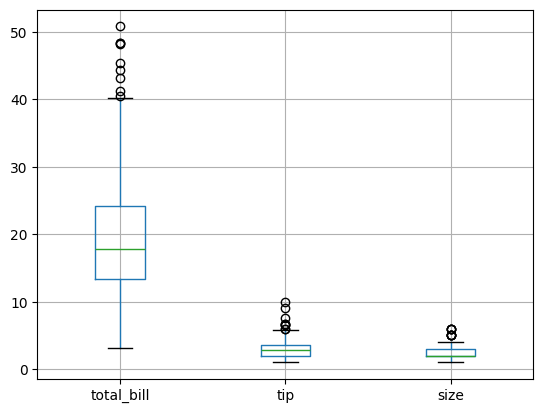

In [97]:
df.boxplot()

In [98]:
numeraic_columns=df.select_dtypes('number').columns
numeraic_columns

Index(['total_bill', 'tip', 'size'], dtype='object')

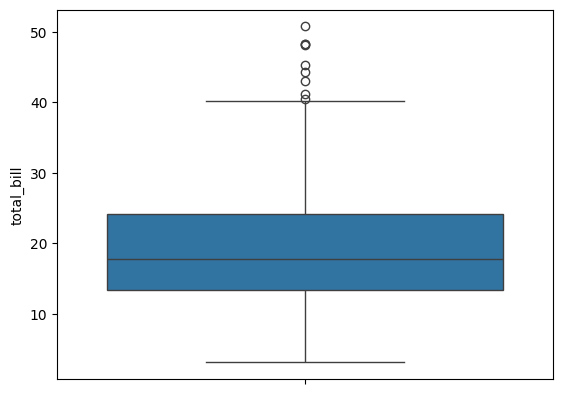

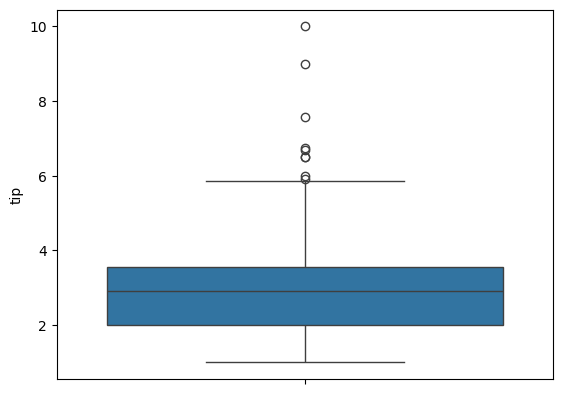

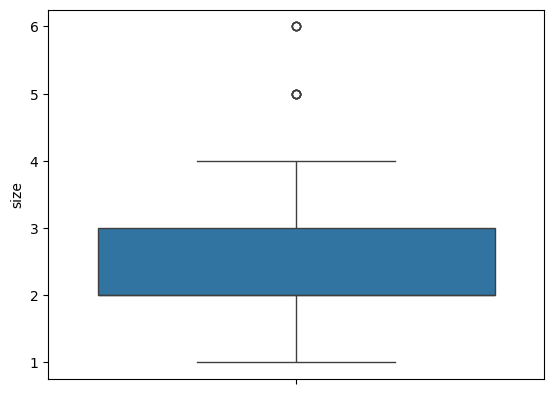

In [99]:
for i in numeraic_columns:
    sns.boxplot(df[i])
    plt.show()

In [100]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [101]:
df.duplicated().sum()

1

In [102]:
df
x= df.drop('tip',axis=1)
y=df['tip']

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [104]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='if_binary')
ohe.fit(x_train.select_dtypes(exclude='number'))
encoded_data = ohe.transform(x_train.select_dtypes(exclude='number'))
testencoded_data = ohe.transform(x_test.select_dtypes(exclude='number'))

In [105]:
encoded_data.shape

(195, 7)

In [106]:
x_train.drop(x_train.select_dtypes(exclude='number'),axis=1,inplace=True)
x_test.drop(x_test.select_dtypes(exclude='number'),axis=1,inplace=True)

In [107]:
x_train_encoded=pd.DataFrame(encoded_data.toarray(),columns=ohe.get_feature_names_out())
x_test_encoded=pd.DataFrame(testencoded_data.toarray(),columns=ohe.get_feature_names_out())

x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)

x_train=pd.concat([x_train,x_train_encoded],axis=1)
x_test=pd.concat([x_test,x_test_encoded],axis=1)

In [108]:
x_train.shape,x_test.shape

((195, 9), (49, 9))

In [109]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [110]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
pred=lr.predict(x_train)
print(mean_absolute_error(y_train,pred))
print(mean_squared_error(y_train,pred))

0.7599651398627878
1.1006793812325255


In [111]:
pred=lr.predict(x_test)
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))

0.6671331480264912
0.7033566017436164


In [112]:
lr.coef_

array([ 0.09469974,  0.23348393,  0.02881928, -0.19235325,  0.10407492,
       -0.08171038,  0.05328153, -0.07564606,  0.09495716])

In [113]:
from sklearn.linear_model import Lasso,Ridge
lasso = Lasso(alpha=0.01)
ridge = Ridge()
lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [114]:
lasso.coef_

array([ 0.09460724,  0.22466766,  0.        , -0.13768707,  0.        ,
       -0.09755243,  0.        , -0.        ,  0.        ])

In [115]:
lasso.feature_names_in_

array(['total_bill', 'size', 'sex_Male', 'smoker_Yes', 'day_Fri',
       'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch'], dtype=object)

In [116]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
pred=lasso.predict(x_train)
print(mean_absolute_error(y_train,pred))
print(mean_squared_error(y_train,pred))



0.7607795260689736
1.102845200318465


In [117]:
pred=lasso.predict(x_test)
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))

0.6623516926171163
0.6791265933537928


In [118]:
ridge.fit(x_train,y_train)

Ridge()

In [119]:
ridge.coef_

array([ 0.09468174,  0.23219257,  0.02796095, -0.18676818,  0.09818317,
       -0.08636663,  0.04830919, -0.06012573,  0.07532015])

In [120]:
pred=ridge.predict(x_train)
print(mean_absolute_error(y_train,pred))
print(mean_squared_error(y_train,pred))

0.7596719907352047
1.1007009065170312


In [121]:
pred=ridge.predict(x_test)
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))

0.6664732222187691
0.7011150974903518


In [122]:
import pickle
pickle.dump(lasso,open('lasso.pkl','wb'))
pickle.dump(lr,open('lr.pkl','wb'))
pickle.dump(ohe,open('ohe.pkl','wb'))

In [123]:
lasso.feature_names_in_

array(['total_bill', 'size', 'sex_Male', 'smoker_Yes', 'day_Fri',
       'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch'], dtype=object)

In [124]:
encoded= ohe.transform([['Male','No','Sun','Dinner']])
x= encoded.toarray()[0]
input_model = np.concatenate([[50,2],x])
lr.predict([input_model])



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.90739629])

In [125]:
ohe.feature_names_in_

array(['sex', 'smoker', 'day', 'time'], dtype=object)

In [126]:
lr.predict([[50.2,3,1,0,1,0,0,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.30557071])

In [127]:
df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [128]:
from sklearn.datasets import load_iris

In [129]:
df= load_iris()

In [130]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [131]:
x=df['data']
y=df['target']

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=213)

In [139]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

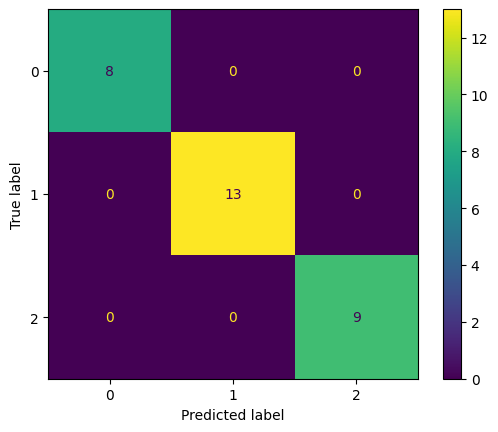

In [140]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay
conf = confusion_matrix(y_test,lr.predict(x_test))
ConfusionMatrixDisplay(conf).plot()

In [141]:
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

